# Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Data

In [9]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualizations

In [20]:
# Function to visualize columns distribution
def visualize_column(column):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

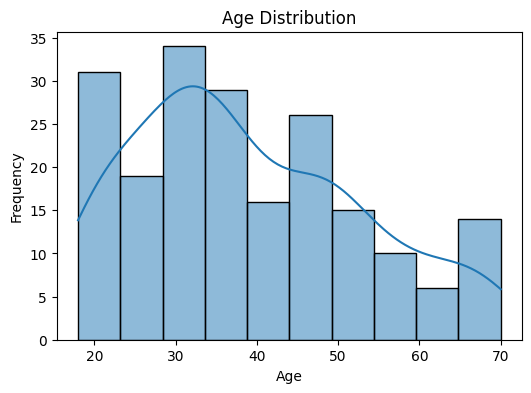

In [21]:
# Age dist
visualize_column('Age')

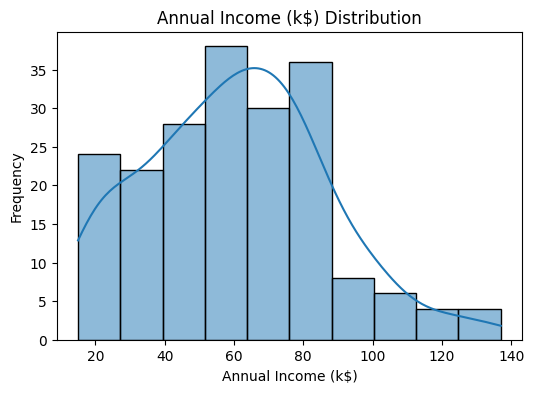

In [22]:
# Annual Income (k$) dist
visualize_column('Annual Income (k$)')

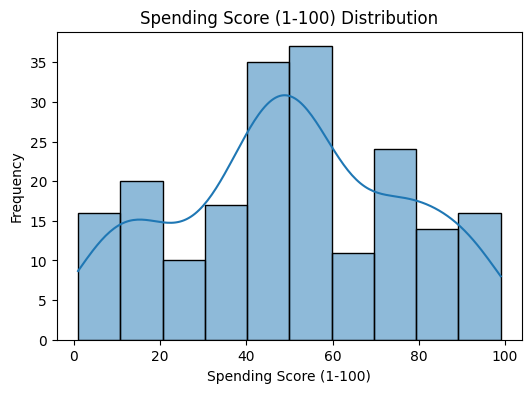

In [23]:
# Spending Score dist
visualize_column('Spending Score (1-100)')

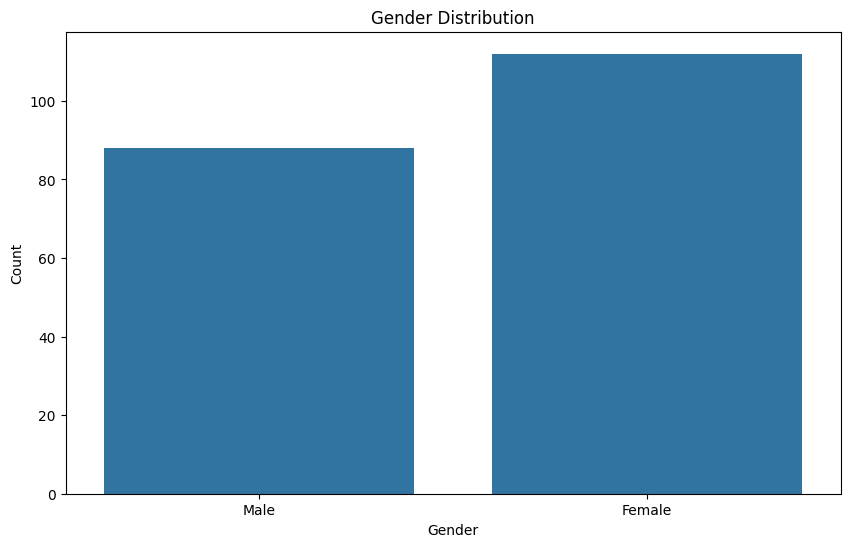

In [24]:
# Gender dist
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [25]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

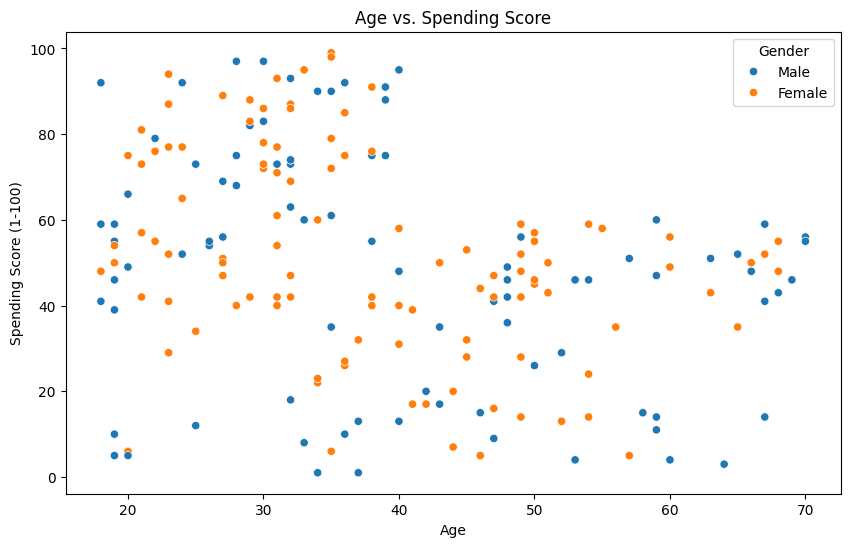

In [26]:
# Age vs. Spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

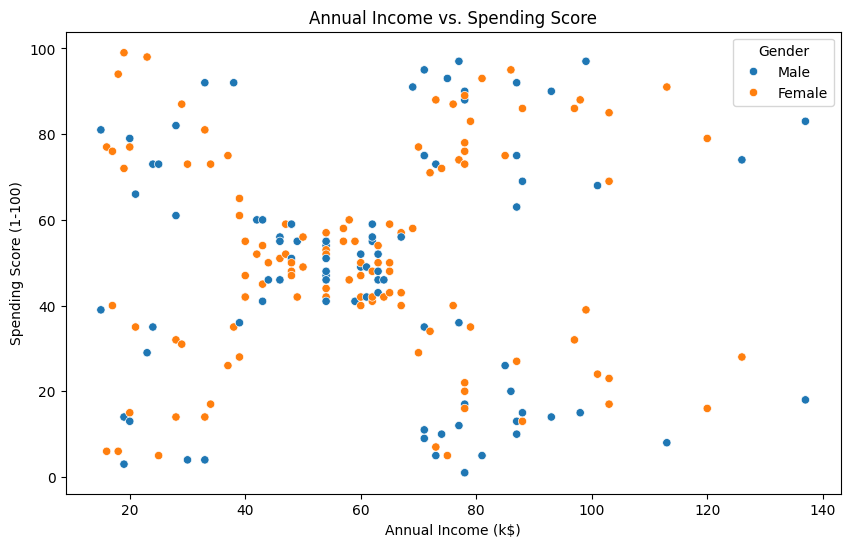

In [27]:
# Annual Income vs. Spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

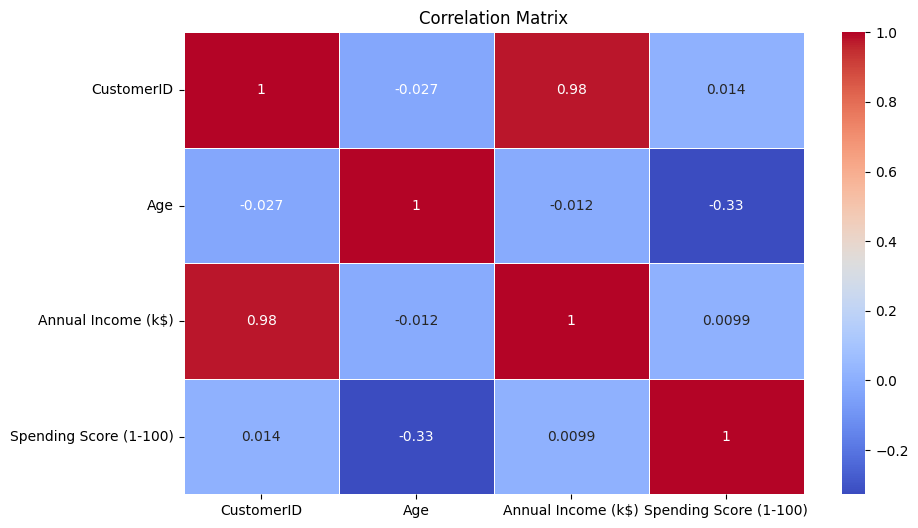

In [31]:
# corr matrix
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corr Matrix')
plt.show()

# Data Preprocessing


In [32]:
from sklearn.preprocessing import StandardScaler

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [35]:
df_scaled[:10]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

# Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kme

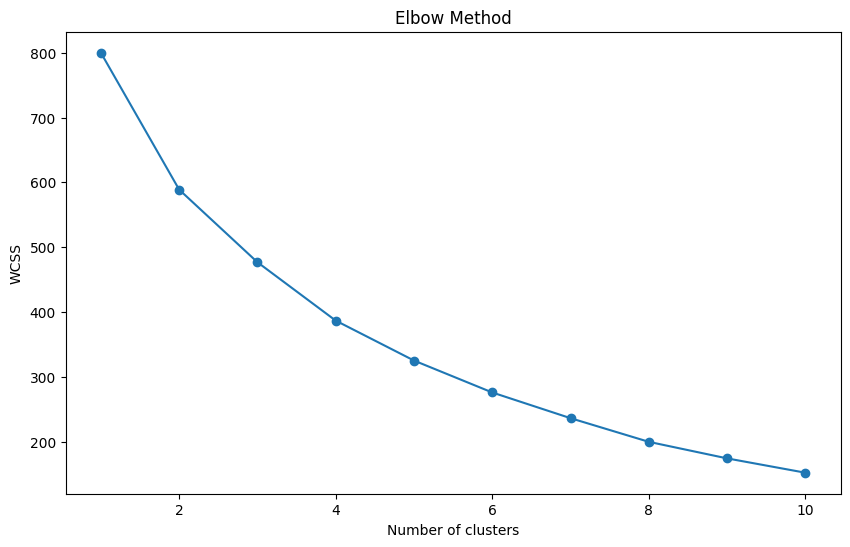

In [36]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means clustring

In [57]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(


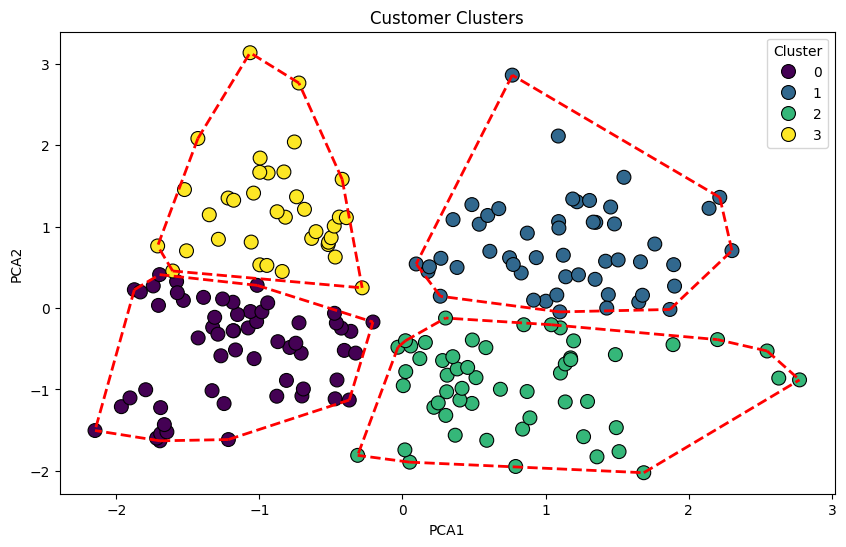

In [62]:
from sklearn.covariance import EllipticEnvelope
from scipy.spatial import ConvexHull

# Visualize the clusters with convex hulls
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100, edgecolor='k')

# Add convex hulls around clusters
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(cluster_data)
        for simplex in hull.simplices:
            plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], 'r--', lw=2)

plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()